TO DO: 
  
Learn the key tools and assess them:   
  
  1) Use tensorflow_hub to import inception v3 (shown below) and inception v4, and resnet v2, and perhaps MobileNet as well for speed. 
    1b) Try different classifiers out using the output feature vectors
      1c) SVM should be the most simple to use early on, but a seperate NN can be used to classify. 
        1d) Also consider PCA prior to SVM. 
  2) Download face database and asses their accuracy 
    2b) Test how biased they are with respect to age, gender, skin color. 
    
 ------   
Data collection phase:    
    
  3) Pick a location from youtube and use youtube API to download video in that location 
  4) Find youtube users in that location, download all their videos, create a database of their faces 
  
  
  
 ------
 
 Applying the tools: 
 
 
  5) Test ability of the pre-trained models to classify this database of youtubers in a specific location. 
  6) apply these models on the collection of videos in the area where the youtubers live to try and find their faces
    6b) what is the most efficient way to extract and analyze the faces? 

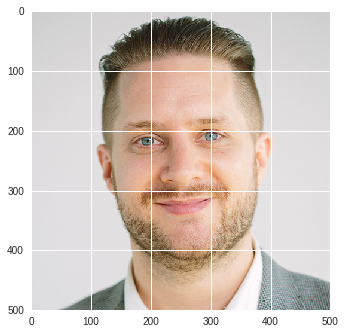

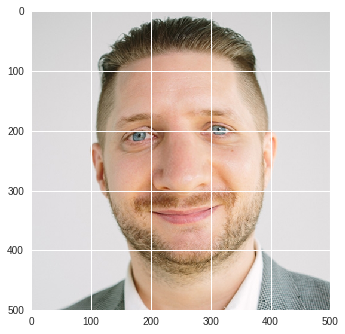

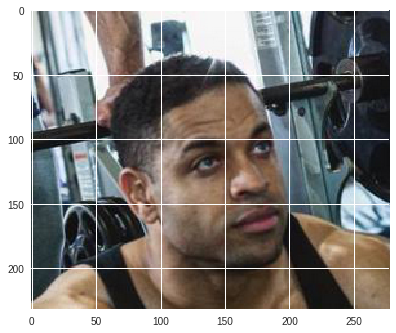

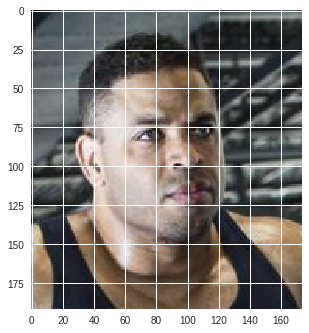

In [0]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from google.colab import files
from IPython.display import Image

#uploaded = files.upload() #image is uploaded.  #only needed to do this once

image = cv2.imread('image0.jpg')
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('imageB1.png')
image3 = cv2.imread('imageB2.png')

plt.imshow(image[...,::-1])
plt.show()

plt.imshow(image1[...,::-1])
plt.show()

plt.imshow(image2[...,::-1])
plt.show()

plt.imshow(image3[...,::-1])
plt.show()

In [0]:
#module = hub.Module("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1") #This model is already able to classify many faces generally but may not be able to classify the specific classes we are interested in


module = hub.Module("https://tfhub.dev/google/imagenet/mobilenet_v2_100_128/feature_vector/2")
  
height, width = hub.get_expected_image_size(module)
image = cv2.resize(image, (width, height)) 
image1 = cv2.resize(image1, (width, height)) 
image2 = cv2.resize(image2, (width, height)) 
image3 = cv2.resize(image3, (width, height)) 
print(image.shape)
image_batch = np.zeros(((0,height,width,3)))
image_batch = np.insert(image_batch, 0, image, axis=0)
image_batch = np.insert(image_batch, 1, image1, axis=0)
image_batch = np.insert(image_batch, 2, image2, axis=0)
image_batch = np.insert(image_batch, 3, image3, axis=0)
print(image_batch.shape)
features = module(image_batch)  # Features with shape [batch_size, num_features].

print(features.shape) #these features represent a "generalization" of an image, almost like an image-ID ... similar images should have similar values in these vectors. 
                      #because we trust the original model is good at summarizing the variation in images

print(height*width)

(128, 128, 3)
(4, 128, 128, 3)
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0311 02:32:54.175035 140694363027328 saver.py:1483] Saver not created because there are no variables in the graph to restore


(4, 1280)
16384


In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  print(sess.run(features))
  output = sess.run(features)
  print(type(output))



[[0.         0.04181499 0.48206088 ... 0.         0.42415655 0.        ]
 [0.         0.         0.53146553 ... 0.         0.603005   0.        ]
 [0.         0.         0.         ... 0.5862645  0.45309785 0.        ]
 [0.         0.         0.         ... 0.         0.8027961  0.        ]]
<class 'numpy.ndarray'>


In [0]:
# print('Euclidian distance between image 0 and image 1', np.linalg.norm(output[0]-output[1]))
# print('Euclidian distance between image 0 and image 2', np.linalg.norm(output[0]-output[2]))
# print('Euclidian distance between image 0 and image 3', np.linalg.norm(output[0]-output[3]))

# print('Euclidian distance between image 1 and image 2', np.linalg.norm(output[1]-output[2]))

# print('Euclidian distance between image 2 and image 3', np.linalg.norm(output[2]-output[3]))

Euclidian distance between image 0 and image 1 89.940895
Euclidian distance between image 0 and image 2 1250.8947
Euclidian distance between image 0 and image 3 930.6161
Euclidian distance between image 1 and image 2 1250.0298
Euclidian distance between image 2 and image 3 714.5116


In [0]:
print('Euclidian distance between image 0 and image 1', np.linalg.norm(output[0]-output[1]))
print('Euclidian distance between image 0 and image 2', np.linalg.norm(output[0]-output[2]))
print('Euclidian distance between image 0 and image 3', np.linalg.norm(output[0]-output[3]))

print('Euclidian distance between image 1 and image 2', np.linalg.norm(output[1]-output[2]))

print('Euclidian distance between image 2 and image 3', np.linalg.norm(output[2]-output[3]))

Euclidian distance between image 0 and image 1 5.877079
Euclidian distance between image 0 and image 2 23.679993
Euclidian distance between image 0 and image 3 19.059267
Euclidian distance between image 1 and image 2 23.953295
Euclidian distance between image 2 and image 3 11.916214
